<p align="center">
  <a href="https://www.uit.edu.vn/" title="Trường Đại học Công nghệ Thông tin" style="border: none;">
    <img src="https://i.imgur.com/WmMnSRt.png" alt="Trường Đại học Công nghệ Thông tin | University of Information Technology">
  </a>
</p>
<h1 align="center"><b>CS116.M12.KHCL - LẬP TRÌNH PYTHON CHO MÁY HỌC</b></h1>
<h1 align="center"><b>ĐỒ ÁN CUỐI KỲ: KERNEL PCA </b></h1>
<h1 align="center"><b>DATASET: SIGN LANGUAGE DIGITS </b></h1>

| Tên thành viên    | MSSV     |
| ----------------- | -------- |
| Thái Trần Khánh Nguyên | 19520188 |
| Nguyễn Khánh Như     | 19520209 |
| Lê Văn Trí      | 19521043 |

#Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/University/CS116.M12.KHCL/Final_Project_CS116/

/content/drive/MyDrive/University/CS116.M12.KHCL/Final_Project_CS116


In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import seaborn as sns
from sklearn import metrics

# Load Dataset

In [4]:
x_load = np.load('./Data/SignLanguageDigitsDataset/X.npy')
y_load = np.load('./Data/SignLanguageDigitsDataset/Y.npy')
img_size = 64

In [5]:
# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]

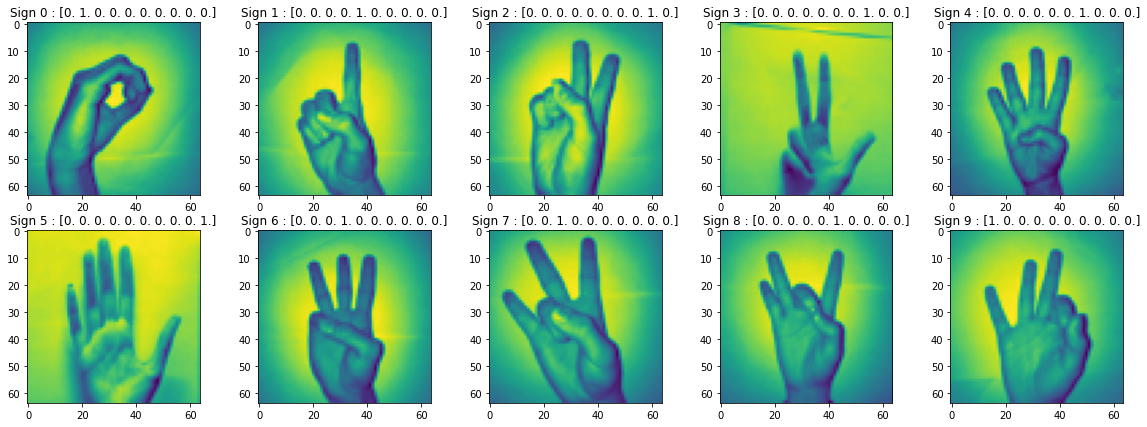

In [6]:
fig, sub = plt.subplots(2, 5, figsize=(20,7))

for each, ax in zip(range(10), sub.flatten()):

    ax.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    title = "Sign " + str(each) + " : " + str(y_load[image_index_list[each]])
    ax.set_title(title)

plt.show()

# Data Preprocessing

In [7]:
labels = []
for idx in range(10):
  label = ""
  for j in y_load[image_index_list[idx]]:
    label += str(int(j))
  labels.append(label)
labels

['0100000000',
 '0000100000',
 '0000000010',
 '0000000100',
 '0000001000',
 '0000000001',
 '0001000000',
 '0010000000',
 '0000010000',
 '1000000000']

In [8]:
Y = []
for idx in y_load:
  tmp = ""
  for j in idx:
    tmp += str(int(j))
  Y.append(labels.index(tmp))

Y = np.array(Y)
Y.shape

(2062,)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(x_load, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

number_of_train, number_of_test

(1649, 413)

In [10]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (1649, 4096)
X test flatten (413, 4096)


In [11]:
X_flatten = x_load.reshape(x_load.shape[0],X_train.shape[1]*X_train.shape[2])
print("X train flatten",X_flatten.shape)

X train flatten (2062, 4096)


# Train LR

In [ ]:
start = time.time() 
model_LR = LogisticRegression(solver='lbfgs', max_iter=5000)
model_LR.fit(X_train_flatten, Y_train)
end = time.time()
print("Time:", end - start)

Time: 173.6045696735382


In [ ]:
score = model_LR.score(X_test_flatten, Y_test)
predictions = model_LR.predict(X_test_flatten)
cm = metrics.confusion_matrix(Y_test, predictions)

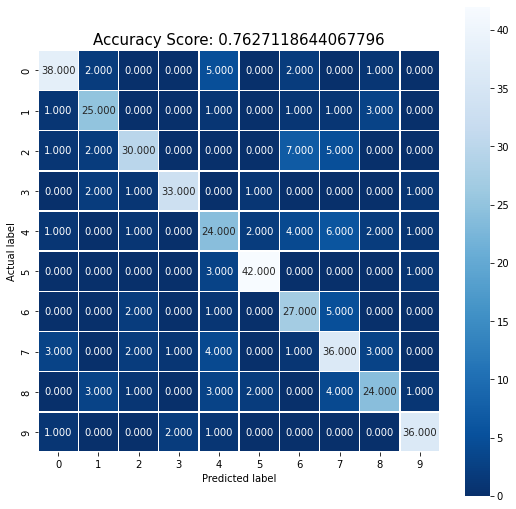

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Kernel PCA

In [ ]:
clf_LR = Pipeline([
                ("kpca", KernelPCA()),
                ("log_reg", LogisticRegression(solver='lbfgs', max_iter=5000))
                ])
n_components = [100, 300, 500, 700, 1000, 1500, 2000]
param_grid_LR = [{"kpca__kernel": ["linear"], "kpca__n_components": n_components },
                 
              {"kpca__kernel": ["rbf"], "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": n_components },

              {"kpca__kernel": ["sigmoid"], "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": n_components },

              { 'kpca__kernel': ['poly'], 'kpca__degree': [1,2,3,5], 
               "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": n_components }]

In [ ]:
grid_search_LR = GridSearchCV(clf_LR, param_grid_LR, refit = True, verbose = 3, cv = 5)
grid_search_LR.fit(X_train_flatten, Y_train)

Fitting 5 folds for each of 427 candidates, totalling 2135 fits
[CV 1/5] END kpca__kernel=linear, kpca__n_components=100;, score=0.758 total time=   0.7s
[CV 2/5] END kpca__kernel=linear, kpca__n_components=100;, score=0.773 total time=   0.6s
[CV 3/5] END kpca__kernel=linear, kpca__n_components=100;, score=0.748 total time=   0.6s
[CV 4/5] END kpca__kernel=linear, kpca__n_components=100;, score=0.752 total time=   0.6s
[CV 5/5] END kpca__kernel=linear, kpca__n_components=100;, score=0.726 total time=   0.7s
[CV 1/5] END kpca__kernel=linear, kpca__n_components=300;, score=0.742 total time=   0.9s
[CV 2/5] END kpca__kernel=linear, kpca__n_components=300;, score=0.755 total time=   0.8s
[CV 3/5] END kpca__kernel=linear, kpca__n_components=300;, score=0.748 total time=   0.8s
[CV 4/5] END kpca__kernel=linear, kpca__n_components=300;, score=0.736 total time=   0.9s
[CV 5/5] END kpca__kernel=linear, kpca__n_components=300;, score=0.754 total time=   0.9s
[CV 1/5] END kpca__kernel=linear, kp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.6s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=100;, score=0.715 total time=  12.4s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.2s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  10.3s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=100;, score=0.684 total time=  12.2s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   5.7s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=300;, score=0.752 total time=   6.4s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.03, kpca__kernel=poly, kpca__n_components=300;, score=0.739 total time=   5.5s
[CV 4/5] END kpca__degre

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=100;, score=0.712 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.1s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=100;, score=0.676 total time=  12.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=100;, score=0.681 total time=  13.0s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   4.6s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   5.2s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=300;, score=0.736 total time=   5.4s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   4.8s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   4.5s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03222222222222222, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   7.1s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=100;, score=0.712 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=100;, score=0.679 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=100;, score=0.681 total time=  13.4s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   4.8s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=300;, score=0.752 total time=   6.9s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=300;, score=0.736 total time=   4.3s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.4s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   4.6s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.034444444444444444, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   5.3s
[CV 2/5] END kpca__degree=3, kpca_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=100;, score=0.685 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=100;, score=0.715 total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=100;, score=0.676 total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=100;, score=0.681 total time=  13.2s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   4.8s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   4.7s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=300;, score=0.736 total time=   4.9s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.6s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   4.7s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03666666666666667, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   5.2s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=100;, score=0.685 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=100;, score=0.709 total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.2s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=100;, score=0.676 total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=100;, score=0.678 total time=  13.3s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   6.7s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   5.8s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=300;, score=0.733 total time=   4.6s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   7.5s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   5.1s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.03888888888888889, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   6.8s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=100;, score=0.712 total time=  13.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=100;, score=0.688 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=100;, score=0.679 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=100;, score=0.678 total time=  13.3s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   5.1s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   6.3s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=300;, score=0.733 total time=   4.7s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   4.5s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   5.1s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04111111111111111, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   6.0s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=100;, score=0.709 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=100;, score=0.685 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=100;, score=0.678 total time=  13.6s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=300;, score=0.703 total time=   5.0s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   9.1s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=300;, score=0.733 total time=   4.7s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.0s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=300;, score=0.714 total time=   9.0s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.043333333333333335, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   6.0s
[CV 2/5] END kpca__degree=3, kpca_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=100;, score=0.709 total time=  12.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=100;, score=0.676 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=100;, score=0.678 total time=  13.4s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.4s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   7.2s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=300;, score=0.733 total time=   5.6s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   4.9s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=300;, score=0.711 total time=   5.5s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04555555555555556, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   7.6s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=100;, score=0.682 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=100;, score=0.706 total time=  13.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=100;, score=0.697 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=100;, score=0.676 total time=  13.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=100;, score=0.681 total time=  13.3s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.6s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=300;, score=0.748 total time=   5.4s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=300;, score=0.733 total time=   4.9s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   5.2s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=300;, score=0.708 total time=   4.3s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.04777777777777778, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=   7.4s
[CV 2/5] END kpca__degree=3, kpca__gamma=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 1/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=100;, score=0.679 total time=  13.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=100;, score=0.703 total time=  13.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 3/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=100;, score=0.694 total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=100;, score=0.679 total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 5/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=100;, score=0.684 total time=  13.6s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=300;, score=0.700 total time=   9.2s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=300;, score=0.745 total time=   5.8s
[CV 3/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=300;, score=0.736 total time=   5.1s
[CV 4/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=300;, score=0.697 total time=   5.8s
[CV 5/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=300;, score=0.708 total time=   4.4s
[CV 1/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=500;, score=0.718 total time=  10.2s
[CV 2/5] END kpca__degree=3, kpca__gamma=0.05, kpca__kernel=poly, kpca__n_components=500;, score=0.767 total time=   6.2s
[CV 3/5] END kpca__degre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000))]),
             param_grid=[{'kpca__kernel': ['linear'],
                          'kpca__n_components': [100, 300, 500, 700, 1000, 1500,
                                                 2000]},
                         {'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf'...
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['sigmoid'],
                          'kpca__n_components': [100, 300, 500, 700, 1000, 1500,
                                                 2000]},
                         {'kpca__degree': [1, 2, 3, 5],
                          'kpca__gamma': array([0.0

In [ ]:
print(grid_search_LR.best_params_)
print(grid_search_LR.best_score_)

{'kpca__degree': 1, 'kpca__gamma': 0.04777777777777778, 'kpca__kernel': 'poly', 'kpca__n_components': 1500}
0.7695477572073316


In [ ]:
import pandas as pd
data_csv_LR = pd.concat([pd.DataFrame(grid_search_LR.cv_results_["params"]),pd.DataFrame(grid_search_LR.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
data_csv_LR = pd.concat([data_csv_LR, pd.DataFrame(grid_search_LR.cv_results_["mean_fit_time"], columns=["Fit_time"])], axis=1)

In [ ]:
data_csv_LR.to_csv('file_LR_KPCA_gridsearch2.csv', encoding='utf-8')

# SVM

In [ ]:
start = time.time()
model_SVM = SVC(kernel = 'rbf', random_state = 19520188)
model_SVM.fit(X_train_flatten, Y_train)
end = time.time()
print("Time:", end - start)

Time: 5.193457365036011


In [ ]:
score = model_SVM.score(X_test_flatten, Y_test)
predictions =model_SVM.predict(X_test_flatten)
cm = metrics.confusion_matrix(Y_test, predictions)

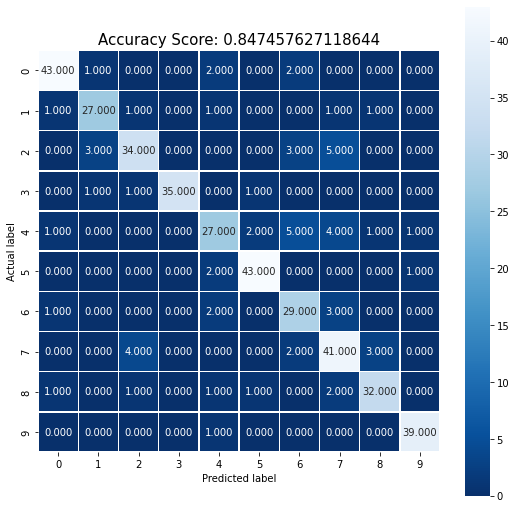

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
clf = Pipeline([
                ("kpca", KernelPCA()),
                ("log_reg", SVC())
                ])

param_grid = [{"kpca__kernel": ["linear"], "kpca__n_components": [100, 300, 500, 700, 1000, 2000], "log_reg__kernel": ['rbf', 'linear', 'sigmoid']},
              {"kpca__kernel": ["rbf"], "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": [100, 300, 500, 700, 1000, 2000], "log_reg__kernel": ['rbf', 'linear', 'sigmoid']},
              {"kpca__kernel": ["sigmoid"], "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": [100, 300, 500, 700, 1000, 2000], "log_reg__kernel": ['rbf', 'linear', 'sigmoid']},
              { 'kpca__kernel': ['poly'], 'kpca__degree': [1,2,3,5], "kpca__gamma": np.linspace(0.03, 0.05, 10, 15), "kpca__n_components": [100, 300, 500, 700, 1000, 2000], "log_reg__kernel": ['rbf', 'linear', 'sigmoid']},
              ]

In [ ]:
grid_search = GridSearchCV(clf, param_grid, refit = True, verbose = 3, cv = 5)
grid_search.fit(X_flatten, Y)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=500, log_reg__kernel=sigmoid;, score=0.816 total time=   2.1s
[CV 2/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=500, log_reg__kernel=sigmoid;, score=0.811 total time=   2.1s
[CV 3/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=500, log_reg__kernel=sigmoid;, score=0.796 total time=   2.1s
[CV 4/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=500, log_reg__kernel=sigmoid;, score=0.789 total time=   2.1s
[CV 5/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=500, log_reg__kernel=sigmoid;, score=0.786 total time=   2.1s
[CV 1/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=700, log_reg__kernel=rbf;, score=0.409 total time=   3.4s
[CV 2/5] END kpca__gamma=0.03888888888888889, kpca__kernel=rbf, kpca__n_components=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kpca', KernelPCA()),
                                       ('log_reg', SVC())]),
             param_grid=[{'kpca__kernel': ['linear'],
                          'kpca__n_components': [100, 300, 500, 700, 1000,
                                                 2000],
                          'log_reg__kernel': ['rbf', 'linear', 'sigmoid']},
                         {'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__ke...
                          'kpca__n_components': [100, 300, 500, 700, 1000,
                                                 2000],
                          'log_reg__kernel': ['rbf', 'linear', 'sigmoid']},
                         {'kpca__degree': [1, 2, 3, 5],
                          'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.0

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kpca__kernel': 'linear', 'kpca__n_components': 100, 'log_reg__kernel': 'rbf'}
0.8574096711253203


In [ ]:
import pandas as pd
data_csv = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
data_csv = pd.concat([data_csv, pd.DataFrame(grid_search.cv_results_["mean_fit_time"], columns=["Fit_time"])], axis=1)

In [ ]:
grid_search.cv_results_["mean_fit_time"].shape

(1098,)

In [ ]:
data_csv.to_csv('file_SVM_KPCA_gridsearch2.csv', encoding='utf-8')

#PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
clf_pca = Pipeline([
                ("pca", PCA()),
                ("log_reg", SVC())
                ])

param_grid_pca = [{"pca__n_components": [100, 300, 700, 500, 1000, 2000]}]

In [ ]:
grid_search_pca = GridSearchCV(clf_pca, param_grid_pca, refit = True, verbose = 3, cv = 5)
grid_search_pca.fit(X_flatten, Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .............pca__n_components=100;, score=0.855 total time=   1.4s
[CV 2/5] END .............pca__n_components=100;, score=0.879 total time=   2.0s
[CV 3/5] END .............pca__n_components=100;, score=0.859 total time=   1.5s
[CV 4/5] END .............pca__n_components=100;, score=0.823 total time=   1.5s
[CV 5/5] END .............pca__n_components=100;, score=0.869 total time=   2.1s
[CV 1/5] END .............pca__n_components=300;, score=0.852 total time=   2.1s
[CV 2/5] END .............pca__n_components=300;, score=0.869 total time=   2.0s
[CV 3/5] END .............pca__n_components=300;, score=0.859 total time=   2.0s
[CV 4/5] END .............pca__n_components=300;, score=0.823 total time=   2.4s
[CV 5/5] END .............pca__n_components=300;, score=0.854 total time=   1.9s
[CV 1/5] END .............pca__n_components=700;, score=0.850 total time=   4.0s
[CV 2/5] END .............pca__n_components=700;,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('log_reg', SVC())]),
             param_grid=[{'pca__n_components': [100, 300, 700, 500, 1000,
                                                2000]}],
             verbose=3)

In [ ]:
print(grid_search_pca.best_params_)
print(grid_search_pca.best_score_)

{'pca__n_components': 100}
0.8569254096241096


In [ ]:
import pandas as pd
data_csv_pca = pd.concat([pd.DataFrame(grid_search_pca.cv_results_["params"]),pd.DataFrame(grid_search_pca.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
data_csv_pca = pd.concat([data_csv_pca, pd.DataFrame(grid_search_pca.cv_results_["mean_fit_time"], columns=["Fit_time"])], axis=1)

In [ ]:
data_csv_pca.to_csv('file_SVM_PCA_gridsearch2.csv', encoding='utf-8')

## LR + PCA

In [ ]:
clf_pca_lr = Pipeline([
                ("pca", PCA()),
                ("log_reg", LogisticRegression(max_iter=5000))
                ])

param_grid_pca_lr = [{"pca__n_components": [100, 300, 700, 500, 1000, 2000]}]

In [ ]:
grid_search_pca_lr = GridSearchCV(clf_pca_lr, param_grid_pca_lr, refit = True, verbose = 3, cv = 5)
grid_search_pca_lr.fit(X_flatten, Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .............pca__n_components=100;, score=0.748 total time=   1.5s
[CV 2/5] END .............pca__n_components=100;, score=0.799 total time=   1.4s
[CV 3/5] END .............pca__n_components=100;, score=0.772 total time=   2.0s
[CV 4/5] END .............pca__n_components=100;, score=0.757 total time=   1.5s
[CV 5/5] END .............pca__n_components=100;, score=0.755 total time=   1.4s
[CV 1/5] END .............pca__n_components=300;, score=0.743 total time=   2.0s
[CV 2/5] END .............pca__n_components=300;, score=0.789 total time=   2.1s
[CV 3/5] END .............pca__n_components=300;, score=0.740 total time=   2.1s
[CV 4/5] END .............pca__n_components=300;, score=0.765 total time=   1.9s
[CV 5/5] END .............pca__n_components=300;, score=0.745 total time=   2.3s
[CV 1/5] END .............pca__n_components=700;, score=0.748 total time=   3.6s
[CV 2/5] END .............pca__n_components=700;,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000))]),
             param_grid=[{'pca__n_components': [100, 300, 700, 500, 1000,
                                                2000]}],
             verbose=3)

In [ ]:
print(grid_search_pca_lr.best_params_)
print(grid_search_pca_lr.best_score_)

{'pca__n_components': 100}
0.7662392157784621


In [ ]:
import pandas as pd
data_csv_pca_lr = pd.concat([pd.DataFrame(grid_search_pca_lr.cv_results_["params"]),pd.DataFrame(grid_search_pca_lr.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
data_csv_pca = pd.concat([data_csv_pca_lr, pd.DataFrame(grid_search_pca_lr.cv_results_["mean_fit_time"], columns=["Fit_time"])], axis=1)

In [ ]:
data_csv_pca.to_csv('file_LR_PCA_gridsearch2.csv', encoding='utf-8')

# Genetic Algorithm

In [ ]:
!pip install sklearn-genetic-opt

In [24]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [25]:
clf = Pipeline([
                ("kpca", KernelPCA()),
                ("log_reg", SVC())
                ])

param_grid = {"kpca__kernel": Categorical(["linear", "rbf", "sigmoid", "poly"]), 
              "kpca__n_components": Categorical([100, 300, 500, 700, 1000, 2000]),
              "kpca__gamma": Continuous(0.03, 0.05, distribution='log-uniform'),
              'kpca__degree': Categorical([1,2,3,5])
              }
              

cv = StratifiedKFold(n_splits=5, shuffle=True)

In [26]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=25,
                               tournament_size=3,
                               elitism=True,
                               crossover_probability=0.8,
                               mutation_probability=0.1,
                               param_grid=param_grid,
                               criteria='max',
                               algorithm='eaMuPlusLambda',
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [27]:
evolved_estimator.fit(X_flatten, Y)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.681574	0.258867   	0.851113   	0.100873   
1  	19    	0.846365	0.00220149 	0.851113   	0.843835   
2  	19    	0.847574	0.00354884 	0.853048   	0.842386   
3  	17    	0.847286	0.00260654 	0.852086   	0.843841   
4  	17    	0.850244	0.00335693 	0.858395   	0.845305   
5  	18    	0.852085	0.0033105  	0.858395   	0.846749   
6  	17    	0.854223	0.003221   	0.858395   	0.848685   
7  	19    	0.857135	0.00156644 	0.858401   	0.855004   
8  	20    	0.85723 	0.00209469 	0.858879   	0.852086   
9  	15    	0.859074	0.00203553 	0.863726   	0.855977   
10 	16    	0.860383	0.00369754 	0.864699   	0.852571   
11 	18    	0.861305	0.00303783 	0.864699   	0.854994   
12 	19    	0.860628	0.00413296 	0.864699   	0.852574   
13 	18    	0.862616	0.00226317 	0.864699   	0.856945   
14 	18    	0.860865	0.00400047 	0.864699   	0.853529   
15 	18    	0.863874	0.00181884 	0.864699   	0.858866   
16 	19    	0.861299	0.00382832 	0.865179   	0.85

GASearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
           estimator=Pipeline(steps=[('kpca',
                                      KernelPCA(degree=1,
                                                gamma=0.035396619437037646,
                                                n_components=100)),
                                     ('log_reg', SVC())]),
           generations=25, keep_top_k=4, n_jobs=-1,
           param_grid={'kpca__degree': <sklearn_genetic.space.space.Categorical object at 0x7f249df1fed0>,
                       'kpca__gamma': <sklearn_genetic.space.space.Continuous object at 0x7f249df1f850>,
                       'kpca__kernel': <sklearn_genetic.space.space.Categorical object at 0x7f249df1fb10>,
                       'kpca__n_components': <sklearn_genetic.space.space.Categorical object at 0x7f249df1fdd0>},
           return_train_score=True, scoring='accuracy')

In [31]:
y_predicy_ga = evolved_estimator.predict(X_test_flatten)
accuracy_score(Y_test,y_predicy_ga)

0.9806295399515739